https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")

In [4]:
df=pd.read_csv("football.csv",index_col=0,parse_dates=True)
df.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True
2020-02-01,United States,Costa Rica,1,0,Friendly,Carson,United States,False


# What are the TOP 10 Tournaments

In [7]:
df['tournament'].value_counts()[:10]

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

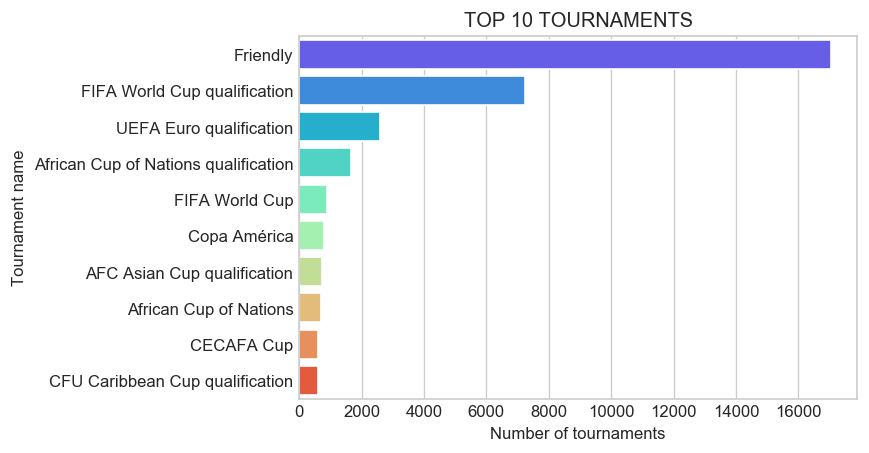

In [73]:
plt.figure(dpi=120)
sns.barplot(y=df['tournament'].value_counts()[:10].index,
            x=df['tournament'].value_counts()[:10].values, palette="rainbow", orient='h')
plt.ylabel('Tournament name')
plt.xlabel('Number of tournaments')
plt.title("TOP 10 TOURNAMENTS")
plt.show()

# Combine Home and Away in to single dataframe

In [16]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [27]:
df1=df[["home_team","home_score"]]
df1.columns=["team","score"]
df2=df[["away_team","away_score"]]
df2.columns=["team","score"]

In [54]:
teams=pd.concat([df1,df2],axis=0).reset_index()
teams.head()

,date,team,score
0,1872-11-30,Scotland,0
1,1873-03-08,England,4
2,1874-03-07,Scotland,2
3,1875-03-06,England,2
4,1876-03-04,Scotland,3


## Calculate Aggregate function to the dataframe

In [85]:
teams_info=teams.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
#teams_info.index=teams_info.team
#teams_info.drop(columns="team",inplace=True)
teams_info.columns=["teamName","totalScores","totalMatches","averageScore"]
teams_info.head()

,teamName,totalScores,totalMatches,averageScore
0,Abkhazia,48,28,1.714286
1,Afghanistan,114,111,1.027027
2,Albania,305,332,0.918675
3,Alderney,15,19,0.789474
4,Algeria,707,505,1.400000


In [86]:
teamtop10=teams_info.sort_values(by="averageScore",ascending=False).head(10)
teamtop10

,teamName,totalScores,totalMatches,averageScore
306,Yorkshire,27,7,3.857143
210,Parishes of Jersey,11,3,3.666667
49,Cascadia,23,7,3.285714
266,Sápmi,84,26,3.230769
131,Isle of Man,156,49,3.183673
261,Surrey,3,1,3.000000
245,Silesia,24,8,3.000000
16,Asturias,3,1,3.000000
14,Artsakh,32,11,2.909091
195,Northern Cyprus,98,34,2.882353


# Display the top 10 in each aggregation

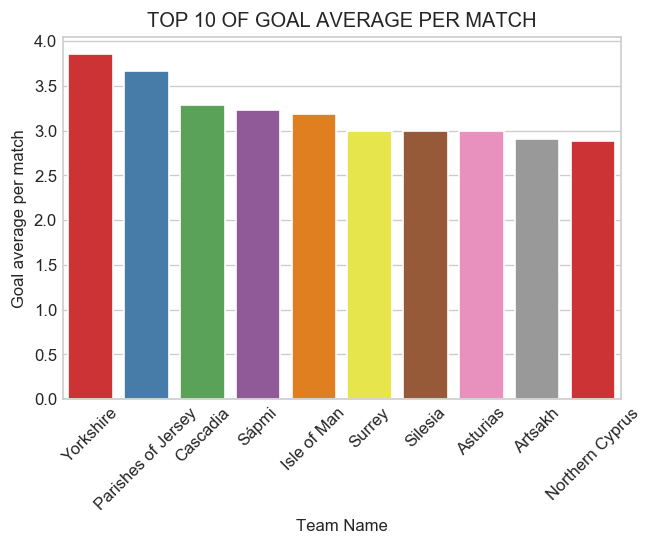

In [69]:
plt.figure(dpi=120)
sns.barplot(x="teamName", y="averageScore", data=teamtop10, palette="Set1")
plt.xlabel('Team Name')
plt.ylabel('Goal average per match')
plt.title("TOP 10 OF GOAL AVERAGE PER MATCH")
plt.xticks(rotation=45)
plt.show()

In [70]:
teamMost10=teams_info.sort_values(by="totalMatches",ascending=False).head(10)
teamMost10

,teamName,totalScores,totalMatches,averageScore
262,Sweden,2015,1018,1.979371
85,England,2208,1009,2.188305
36,Brazil,2149,981,2.190622
12,Argentina,1830,980,1.867347
104,Germany,2124,949,2.238145
124,Hungary,1886,928,2.032328
290,Uruguay,1391,884,1.573529
173,Mexico,1514,869,1.742232
254,South Korea,1512,862,1.754060
96,France,1493,840,1.777381


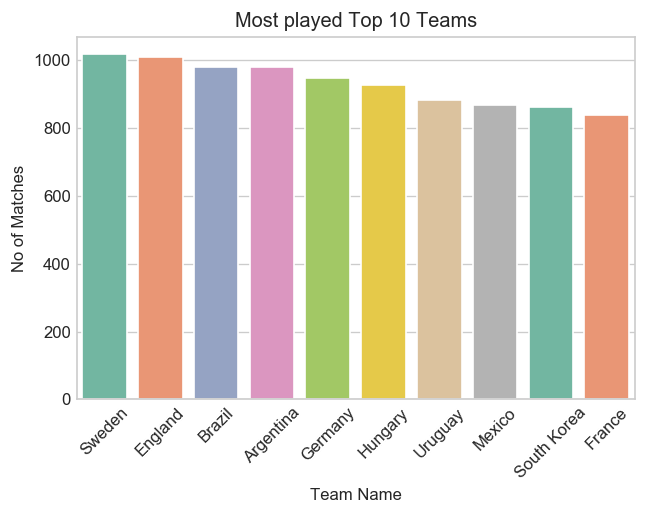

In [71]:
plt.figure(dpi=120)
sns.barplot(x="teamName", y="totalMatches", data=teamMost10, palette="Set2")
plt.xlabel('Team Name')
plt.ylabel('No of Matches')
plt.title("Most played Top 10 Teams")
plt.xticks(rotation=45)
plt.show()